
## DAN - P2: Investigate a Dataset - Titanic

This project is based on information from 891 of the 2224 passengers and crew on board the Titanic. These information come from the Kaggle website.

I will try to determine through data manipulation and visualizations what factors made people more likely to survive.

Because the sinking has happened in the middle of the night, I will particularly focus my research on the location of the people (through class and cabins variable) and about the type of person (childrens, adult, male or female variable) to determine if they had impact the survival rate.

### Python libraries import

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### Create a panda dataframe from the csv file

In [2]:
dfTitanic = pd.read_csv("titanic-data.csv",sep=",")
dfTitanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data structure investigation

According to the kaggle website the description of this dataset is:

- survived = Survival(0 = No; 1 = Yes)
- pclass = Passenger Class(1 = 1st; 2 = 2nd; 3 = 3rd). Pclass is a proxy for socio-economic status (SES)
- name
- sex
- age = Age. Age is in Years; Fractional if Age less than One (1). If the Age is Estimated, it is in the form xx.5
- sibsp = Number of Siblings/Spouses Aboard
- parch = Number of Parents/Children Aboard.
- ticket = Ticket Number
- fare = Passenger Fare
- cabin
- embarked = Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [3]:
dfTitanic.shape

(891, 12)

In [4]:
dfTitanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

These data contain 891 records and 12 variables.

Regarding the main question which is to determine what factors made people more likely to survive, the Survived variable is the dependent variable.

There are 3 categorical variables: Pclass, Sex, and Embarked.

There are 4 continuous variables: Age, SibSp, Parch and Fare.

### Cleaning the data

There are already some variables which don't look very useful in order to answer our question.
I am not interested into each person. So the names and the ticket numbers variables can be deleted. Same thing for the price they have paid.

In [5]:
for column in ['Name', 'Ticket', 'Fare']:
    del dfTitanic[column]

#### Missing data

For the remaining variables I want to be sure that there is no missing data.

In [6]:
for column in ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch']:
    dfTitanic[dfTitanic[column].isnull()]

In [7]:
# dfTitanic[dfTitanic['Age'].isnull()]

There are some missing values for the Age variable. In order to cause the least possible disruption to this variable, I decide to not replace the NaN values for the moment. If necessary I will replace further these values later by using the code below (which replaces the NaN value by the mean of the records).

In [8]:
#ageMean = dfTitanic['Age'].mean()
#dfTitanic['Age'] = dfTitanic['Age'].fillna(value=ageMean)

In [9]:
dfTitanic[dfTitanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
61,62,1,1,female,38.0,0,0,B28,NaN
829,830,1,1,female,62.0,0,0,B28,NaN


There are some missing values for the Embarked variable. I decide to replace them by 'Unknown' value.

In [10]:
dfTitanic['Embarked'] = dfTitanic['Embarked'].fillna(value='Unknown')

In [11]:
# dfTitanic[dfTitanic['Cabin'].isnull()]

There are too many missing  values for this variable. That make it useless and i decide to delete it.

In [12]:
del dfTitanic['Cabin']

#### Data transformation

For a better use some data need to be transformed.

It is interessting to not only define the personn by their sex but also by their age category:
<li>Female adult
<li>Male adult
<li>Elder
<li>Child

In [13]:
def typeOfPeople(age,sex):
    if age < 12:
        return 'Child'
    elif age > 60: 
        return 'Elder'
    elif sex == 'male':
        return 'Adult male'
    else:
        return 'Adult female'

In [14]:
column_type_people = dfTitanic.apply(lambda x: typeOfPeople(x['Age'],x['Sex']), axis=1)
dfTitanic['peopleType']=column_type_people

Sex variable is not useful anymore.

In [15]:
del dfTitanic['Sex']

SibSp and Parch variables can show family support while the Titanic sink but there is no reason to keep them separated.

In [16]:
column_alone = dfTitanic['SibSp'] + dfTitanic['Parch']
dfTitanic['isAlone']=column_alone

SibSp and Parch variables are not useful anymore.

In [17]:
for column in ['SibSp', 'Parch']:
    del dfTitanic[column]

For further clarity I replace the name of each port.

In [18]:
dfTitanic['Embarked'].replace(['C', 'Q','S'], ['Cherbourg', 'Queenstown','Southampton'], inplace=True)

I also change the name of some columns.

In [19]:
dfTitanic.rename(columns={'PassengerId': 'Id', 'Survived': 'isSurvived','Pclass': 'Class','Embarked': 'originPort'}, inplace=True)

### Data exploration

In [20]:
dfTitanic.head(5)

,Id,isSurvived,Class,Age,originPort,peopleType,isAlone
0,1,0,3,22.0,Southampton,Adult male,1
1,2,1,1,38.0,Cherbourg,Adult female,1
2,3,1,3,26.0,Southampton,Adult female,0
3,4,1,1,35.0,Southampton,Adult female,1
4,5,0,3,35.0,Southampton,Adult male,0


In [21]:
dfTitanic[['isSurvived','Age','isAlone']].mean()

isSurvived     0.383838
Age           29.699118
isAlone        0.904602
dtype: float64

#### Reference value
Only 38% of the passengers have survived. It is the reference value for the next visualizations.

#### Survival rate depending on location
I choose to study the survival rate depending on the location of the people.

In [22]:
classTable = pd.pivot_table(dfTitanic,index='Class',columns='isSurvived',aggfunc='size')
classTable

isSurvived,0,1
Class,,
1,80,136
2,97,87
3,372,119


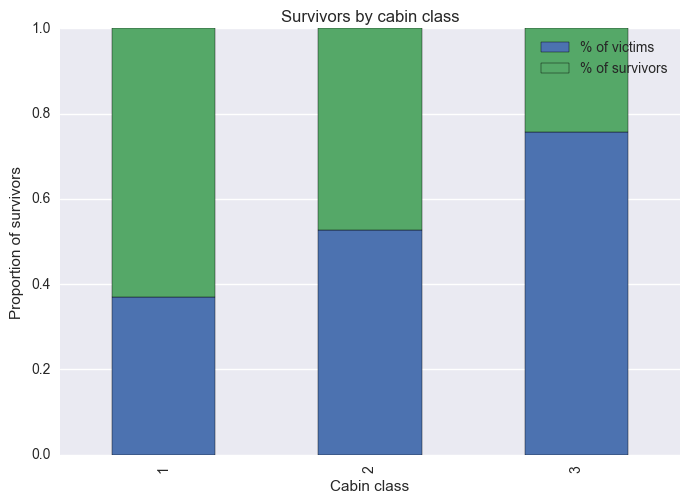

In [23]:
classTable = classTable.div(classTable.sum(axis=1),axis=0)
myGraph = classTable.plot(kind='bar',stacked=True,title="Survivors by cabin class")
myGraph.set_xlabel("Cabin class")
myGraph.set_ylabel("Proportion of survivors")
myGraph.legend(["% of victims","% of survivors"], loc='best')

This chart clearly shows that passengers of first and second class have a higher rate of survival than the third class with a huge rate for the first class.
A brief research about the Titanic explain that the lifeboat were at the top of the Titanic like the first class cabins.

The shipment port should not have the same impact:

In [24]:
portTable = pd.pivot_table(dfTitanic,index='originPort',columns='isSurvived',aggfunc='size')
portTable

isSurvived,0,1
originPort,,
Cherbourg,75.0,93.0
Queenstown,47.0,30.0
Southampton,427.0,217.0
Unknown,NaN,2.0


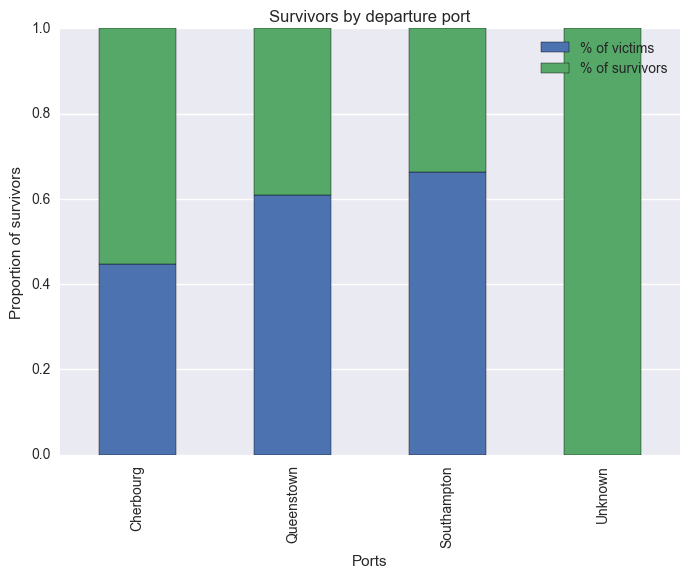

In [25]:
portTable = portTable.div(portTable.sum(axis=1),axis=0)
myGraph = portTable.plot(kind='bar',stacked=True,title="Survivors by departure port")
myGraph.set_xlabel("Ports")
myGraph.set_ylabel("Proportion of survivors")
myGraph.legend(["% of victims","% of survivors"], loc='upper right')

Even if the difference is less pronounced than for the cabin class, there is one between Cherbourg port and the other ports of shipment.

I wonder if this difference is linked to the cabin class.

In [26]:
portclassTable = pd.pivot_table(dfTitanic,index='originPort',columns='Class',aggfunc='size')
portclassTable

Class,1,2,3
originPort,,,
Cherbourg,85.0,17.0,66.0
Queenstown,2.0,3.0,72.0
Southampton,127.0,164.0,353.0
Unknown,2.0,NaN,NaN


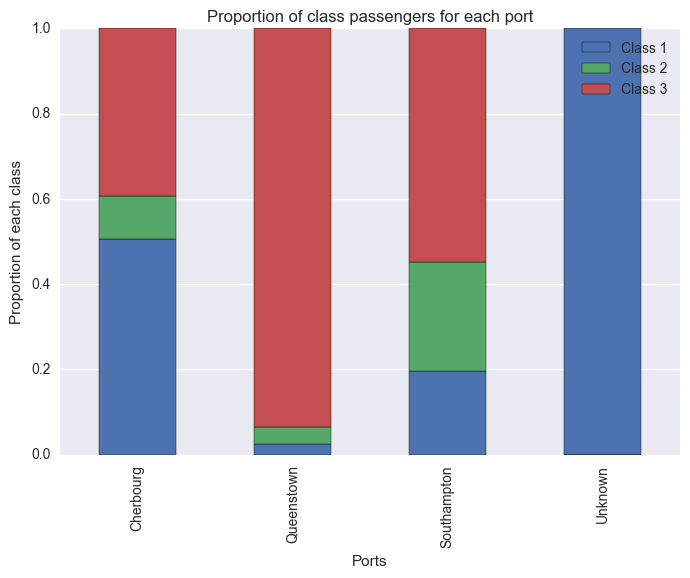

In [27]:
portclassTable = portclassTable.div(portclassTable.sum(axis=1),axis=0)
myGraph = portclassTable.plot(kind='bar',stacked=True,title="Proportion of class passengers for each port")
myGraph.set_xlabel("Ports")
myGraph.set_ylabel("Proportion of each class")
myGraph.legend(["Class 1","Class 2","Class 3"], loc='upper right')

This chart can explain the high survival rate for the Cherbourg port. This port of shipment have been used mainly by first and second class passengers. 

As they have themself an higher survival rate than for the third class, the difference between the ports is not surprising.

#### Survival rate depending on the type of person

I would like to have an idea about the impact of the age on the survival rate.

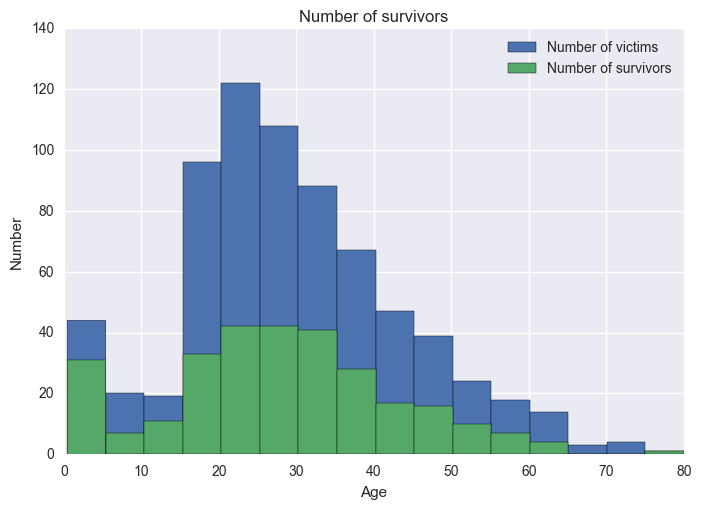

In [28]:
Survivors= dfTitanic[(dfTitanic.isSurvived == 1)]
myGraph = dfTitanic['Age'].dropna().plot(kind='hist',title="Number of survivors",bins=16)
myGraph = Survivors['Age'].dropna().plot(kind='hist',title="Number of survivors",bins=16)
myGraph.set_xlabel("Age")
myGraph.set_ylabel("Number")
myGraph.legend(["Number of victims","Number of survivors"], loc='best')

As I assumed, except for the childs, the age variable does not show a lot of difference between the two histogram trends.

It is better to use the gender variable for adult people.

In [29]:
TypeTable = pd.pivot_table(dfTitanic,index='peopleType',columns='isSurvived',aggfunc='size')
TypeTable

isSurvived,0,1
peopleType,,
Adult female,68,211
Adult male,435,87
Child,29,39
Elder,17,5


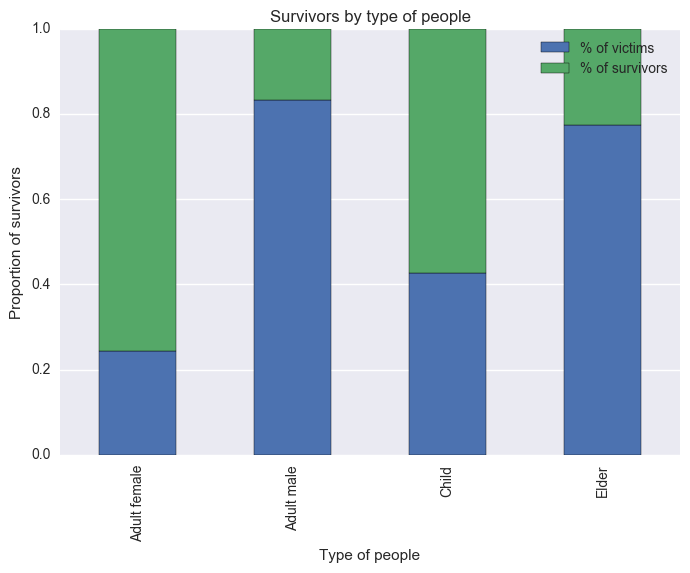

In [30]:
TypeTable = TypeTable.div(TypeTable.sum(axis=1),axis=0)
myGraph = TypeTable.plot(kind='bar',stacked=True,title="Survivors by type of people")
myGraph.set_xlabel("Type of people")
myGraph.set_ylabel("Proportion of survivors")
myGraph.legend(["% of victims","% of survivors"], loc='best')

On this diagram it is clear that the code of conduct "women and childrens first" has been respected.


Did they try to preserve the families in this life-threatening situation?

In [31]:
AloneTable = pd.pivot_table(dfTitanic,index='isAlone',columns='isSurvived',aggfunc='size')
AloneTable

isSurvived,0,1
isAlone,,
0,374.0,163.0
1,72.0,89.0
2,43.0,59.0
3,8.0,21.0
4,12.0,3.0
5,19.0,3.0
6,8.0,4.0
7,6.0,NaN
10,7.0,NaN


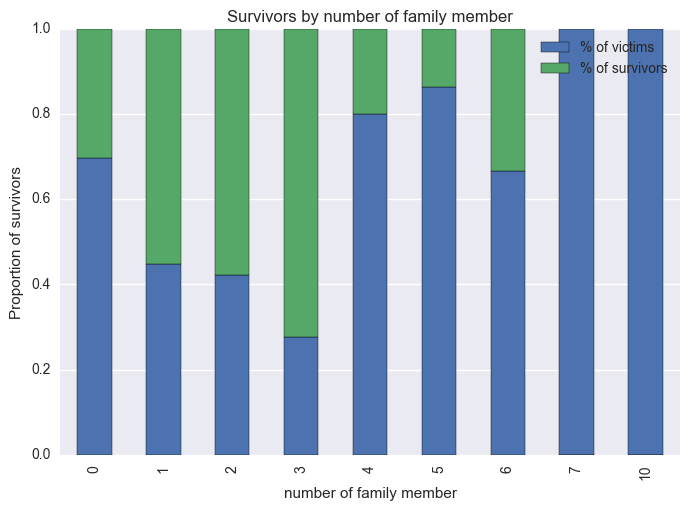

In [32]:
AloneTable = AloneTable.div(AloneTable.sum(axis=1),axis=0)
myGraph = AloneTable.plot(kind='bar',stacked=True,title="Survivors by number of family member")
myGraph.set_xlabel("number of family member")
myGraph.set_ylabel("Proportion of survivors")
myGraph.legend(["% of victims","% of survivors"], loc='upper right')

This diagram looks difficult to explain. I assume that at those distant times lone passengers tends to be male adults and the large families were mainly among the migrants who travelled in third class. 

### Conclusion

In conclusion, it is possible to interpret these data and assume that women and children have been saved before male adults.


This is especially true for the first and second class. Third class passengers were unlucky in the way their location did not give them an easy access to the lifeboat.


The mains variables which seems to impact the survial rate are the type of person (genre/age) and the cabin class. To illustrate these points I make a last diagram which show the survival rate by type and cabin class. 

However, these conclusions should be considered by taking into account some limitations. The data used is only a sample (less than half of the total Titanic passengers) and there is a lot of missing data. That is the case for the cabin variable. As the Titanic has sinked during the night and the access to the lifeboat seems to have been an issue, I would have really like to analyse the location of passengers at midnight (so mainly in their cabins).


I would also have like to be able to create another type of person which would be the crew but there is no variable in this data which allow to do it. 

In [33]:
def classAndType(typeP,classP):
    return typeP + " " + str(classP)

In [34]:
column_classAndType = dfTitanic.apply(lambda x: classAndType(x['peopleType'],x['Class']), axis=1)
dfTitanic['classAndType'] = column_classAndType

In [35]:
classAndTypeTable = pd.pivot_table(dfTitanic,index='classAndType',columns='isSurvived',aggfunc='size')
classAndTypeTable

isSurvived,0,1
classAndType,,
Adult female 1,2.0,89.0
Adult female 2,6.0,62.0
Adult female 3,60.0,60.0
Adult male 1,66.0,41.0
Adult male 2,89.0,7.0
Adult male 3,280.0,39.0
Child 1,1.0,3.0
Child 2,NaN,17.0
Child 3,28.0,19.0


We can note here that for women and childrens of first and second class 171 persons have survived and 9 have been dead. It is a 95% survival rate. 

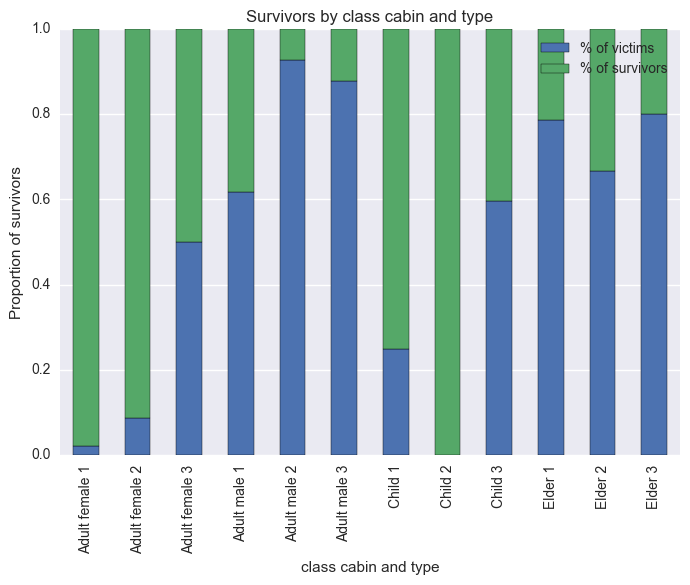

In [36]:
classAndTypeTable = classAndTypeTable.div(classAndTypeTable.sum(axis=1),axis=0)
myGraph = classAndTypeTable.plot(kind='bar',stacked=True,title="Survivors by class cabin and type")
myGraph.set_xlabel("class cabin and type")
myGraph.set_ylabel("Proportion of survivors")
myGraph.legend(["% of victims","% of survivors"], loc='upper right')
